In [8]:
import math

## PHYSICAL CONSTANTS 
R      = 8.3145  # J/mol-K, ideal gas constant
T      = 298.15  # K, temperature
F      = 96485   # C/mol, Faraday's constant
S      = 1E-6   #  electrode surface. Default = 1E-6
F_norm = F/(R*T)


## INDEPENDENT VARIABLES 
### EXPERIMENTALLY CONTROLED
C_red_val  = 1.0    #  mol/L, initial concentration of O. Default = 1.0
C_ox_val   = 0.0    #  mol/L, initial concentration of O. Default = 1.0



### SYSTEM DEPENDENT
E_0        = 0.0    #  electrochemical potential. Default = 0.0
D          = 1E-5   #  cm^2/s, O & R diffusion coefficient. Default = 1E-5
n          = 1.0    #  number of electrons transfered. Default = 1
alpha      = 0.5    #  dimensionless charge-transfer coefficient. Default = 0.5
k0         = 1E-2   #  cm/s, electrochemical rate constant. Default = 1E-2
kc         = 1E-3   #  1/s, chemical rate constant. Default = 1E-3

## SIMULATION VARIABLES
# simulation accuracy in time and space
Nt      = 3000      # number of iterations per t_k (pg 790). Default = 500
Nx      = 200       # number of spatial boxes  Default = 200

# key adimensionnated parameters
DM      = 0.45      #DM = D*Dt/Dx**2 numerical adimensionated diffusion parameter. Default = 0.45
Lambda  = 2         #Lambda  = k0*Dx/D numerical adimensionated electron transfer parameter. Fast if 

# physical distances according to the previosu parameters
L_cuve  = math.floor(D*Nt**0.5) + 3  # longueur physique de la cuve so that we are always in a diffusion controled system
Dx      = L_cuve/Nx  # pas d'espace

## Experimental paramteres in the case of a linear sweep voltammetry
## LSV
E_i     = -0.5
E_f     = +0.5
E_SW    = 0.05
Delta_E = 0.005
v       = 0.11
f       = 100
tau     = 1.0

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# sort all variables in order to be used in the next programms

cst_phys = (R,T,F,F_norm,S)
cst_conc = (C_ox_val, C_red_val)
cst_syst = (E_0, D, n, alpha, k0, kc)
cst_expe = (E_i, E_f, E_SW, Delta_E, v, f, tau)
cst_simu = (Nt, Nx, DM, Lambda, L_cuve, Dx)
cst_all  = (cst_phys, cst_conc, cst_syst, cst_simu, cst_expe)

In [10]:
#from plot_voltammogram_E import main_LSV_E
#main_LSV_E(cst_all)

In [11]:
#from plot_voltammogram_E import main_CSV_E
#main_CSV_E(cst_all)

DM =  0.45 and lambda =  2
Dt =  0.0041887902047863905 and T = 2Pi/f =  0.06283185307179587
YOU SHOULD INCREASE THE NUMBER OF TIME STEPS TO GET MEANINGFUL RESULTS !


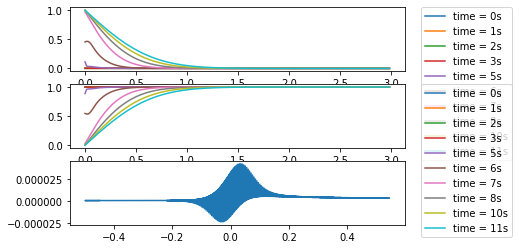

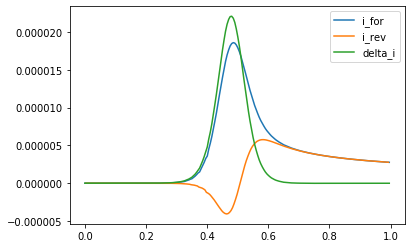

In [12]:
from plot_voltammogram_E import main_SWV_E
from plot_voltammogram_E import plot_SWV
I = main_SWV_E(cst_all)
plot_SWV(cst_all, I)

In [34]:
from potential_applied import SWV

def plot_SWV(cst_all, I):
    (E, tk) = SWV(cst_all[4][0], cst_all[4][1], cst_all[4][2], cst_all[4][3], cst_all[4][5])
    Dt = tk/Nt
    I_for = []
    E_for = []
    I_rev = []
    E_rev = []

    i = 1
    count = 0
    while i < Nt:
        if E((i-1)*Dt) == E(i*Dt):
            i += 1
        else:
            if count == 0:
                I_for.append(I[i-1])
                E_for.append(E((i-1))*Dt)
                count = 1
            else:
                I_rev.append(I[i-1])
                E_rev.append(E((i-1))*Dt)
                count = 0
            i += 1    

    plt.plot(E_for, I_for, label = 'i_for') 
    plt.plot(E_rev, I_rev, label = 'i_rev')

    if len(I_for) == len(I_rev):
        Delta_I = np.array(I_for) - np.array(I_rev)
        plt.plot(E_for, Delta_I, label = 'delta_i') 
    elif len(I_rev) == len(I_for)-1:
        I_rev_new = np.append(0, np.array(I_rev))
        Delta_I = np.array(I_for) - np.array(I_rev_new)
        plt.plot(E_for, Delta_I, label = 'delta_i') 
    else:
        print("Il y a une couille dans le potage")

    plt.legend()
    plt.show()

In [29]:
[2, (i for i in range(5))]

[2, <generator object <genexpr> at 0x11d803450>]

In [18]:
I_rev.append(0)

[-7.377142970515901e-14,
 -1.2484356278429584e-13,
 -1.7065058969446384e-13,
 -2.1944935793276382e-13,
 -3.186408461703141e-13,
 -3.6690228011368783e-13,
 -4.284819960851916e-13,
 -5.184378206846436e-13,
 -6.304014365569865e-13,
 -8.827004121355461e-13,
 -1.0025157258612105e-12,
 -1.1602063494285665e-12,
 -1.3942918381945487e-12,
 -1.687495341597228e-12,
 -2.0468416750447553e-12,
 -2.48482561118856e-12,
 -3.0176544063168272e-12,
 -3.665377343770073e-12,
 -4.4525021941923414e-12,
 -6.21800277248366e-12,
 -7.0546309924217085e-12,
 -8.156018386995701e-12,
 -9.792131508589788e-12,
 -1.1842120102540301e-11,
 -1.4355162476534492e-11,
 -1.741867864586745e-11,
 -2.114604230434655e-11,
 -2.567748939825441e-11,
 -3.118442812357549e-11,
 -3.78755737996061e-11,
 -4.600471037656071e-11,
 -5.588024024740741e-11,
 -6.78768360933804e-11,
 -8.24496158771036e-11,
 -1.1512871454298184e-10,
 -1.3061482943246935e-10,
 -1.5098848295115589e-10,
 -1.8125491395842484e-10,
 -2.191729983306709e-10,
 -3.052695142